Data From here
http://www.usaswimming.org/_Rainbow/Documents/a4d36eef-a307-490e-870f-085967a1522f/SW%20Results%20Book%20V1.pdf

In [1]:
#Replicating this
#https://swimswam.com/problem-rio-pool/

In [15]:
with open("data/raw/riowomen800mfreestyle.txt",'r') as input:
    raw = input.read()

In [16]:
#We extract infor per swimmer
lines = raw.split("\n")

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [70]:
def extractSwimmerData(lines):
    pieces = lines[0].split(" ")
    swimmerName = pieces[3]+" "+pieces[2]
    swimmerTimes = []
    swimmerTimes.append(lines[1].split(" ")[2])
    for i in range(15):
        swimmerTimes.append(lines[2+i*2])
    swimmerTimes = map(lambda e: float(e),swimmerTimes)
    result=[]
    for i in range(len(swimmerTimes)):
        result.append({'name': swimmerName,'time':swimmerTimes[i],'length':50*(i+1)})
    return result

In [71]:
#Extract all the Swimmers Data
result = []
for i in range(len(lines)/32):
    result+=extractSwimmerData(lines[i*31:(i+1)*31])
result=pd.DataFrame(result)

In [72]:
result[:5]

,length,name,time
0,50,Katie LEDECKY,28.39
1,100,Katie LEDECKY,30.42
2,150,Katie LEDECKY,30.20
3,200,Katie LEDECKY,30.94
4,250,Katie LEDECKY,30.87


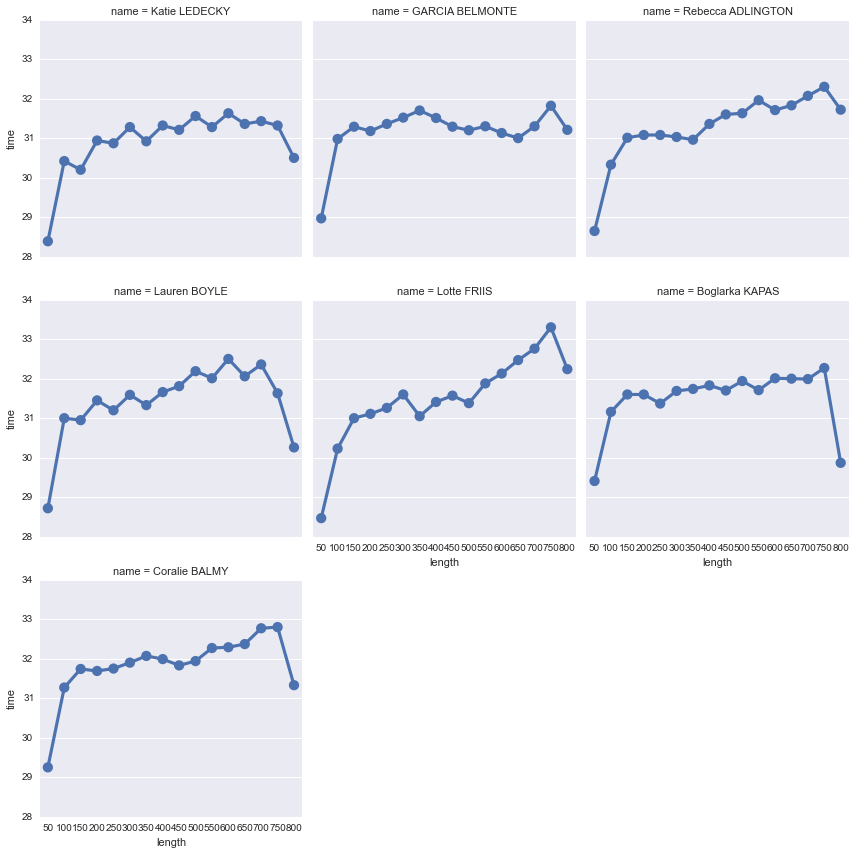

In [74]:
##http://blog.insightdatalabs.com/advanced-functionality-in-seaborn/
sns.factorplot(data=result, x="length", y="time", col="name",col_wrap=3)